In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn

In [2]:
os.getcwd()

'd:\\insurance-premium-prediction\\notebook'

In [3]:
os.chdir(r"D:\insurance-premium-prediction\insurance\artifact\data_ingestion\2022-07-28-19-15-12\ingested_data\train")

In [4]:
os.getcwd()

'D:\\insurance-premium-prediction\\insurance\\artifact\\data_ingestion\\2022-07-28-19-15-12\\ingested_data\\train'

In [5]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,35,male,27.1,1,no,southwest,4746.34
1,48,female,36.6,0,no,northwest,8671.19
2,58,female,36.5,0,no,northwest,12235.84
3,23,female,32.8,2,yes,southeast,36021.01
4,34,female,23.6,0,no,northeast,4992.38


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   expenses  1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.172897,14.034070,18.00,26.0000,39.00,51.0000,64.00
bmi,1070.0,30.699439,6.124253,16.00,26.2000,30.50,34.7750,53.10
children,1070.0,1.071963,1.206259,0.00,0.0000,1.00,2.0000,5.00
expenses,1070.0,13135.899374,12007.167533,1121.87,4746.5175,9382.03,16240.6575,63770.43


In [8]:
df[df.duplicated() == True]

,age,sex,bmi,children,smoker,region,expenses
663,19,male,30.6,0,no,northwest,1639.56


In [9]:
df = df.drop_duplicates()

In [10]:
# checking if any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'expenses'}>]], dtype=object)

<Figure size 1440x864 with 0 Axes>

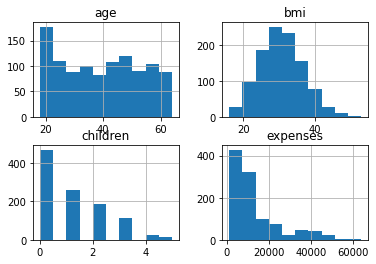

In [11]:
plt.figure(figsize=(20,12))
df.hist()

Observation:
1. age is not normally distributed.
2. bmi is noramlly distributed.
3. most of the samples have no children
4. expenses is following right skewed distribution.

In [12]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
categorical_columns

['sex', 'smoker', 'region']

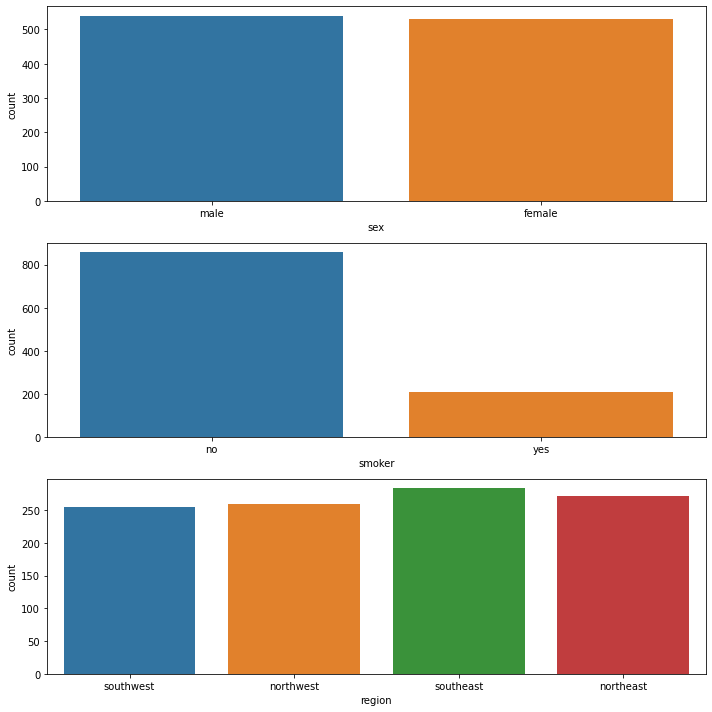

In [13]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_columns):
    ax = plt.subplot(3,1,i+1)
    sns.countplot(x=col, data=df, ax=ax)
plt.tight_layout()
    
        

Observation:

1.male and female are having equal count in sex column.
2.no smoking count is more than 800 as compared to 200 smoking.
3.southeast region is having more count followed by northeast, northwest and southwest.

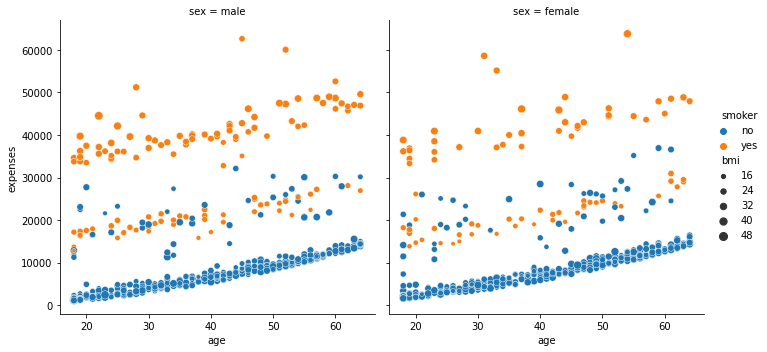

In [14]:
sns.relplot(x='age', y='expenses', data=df, hue='smoker', col='sex', size='bmi')

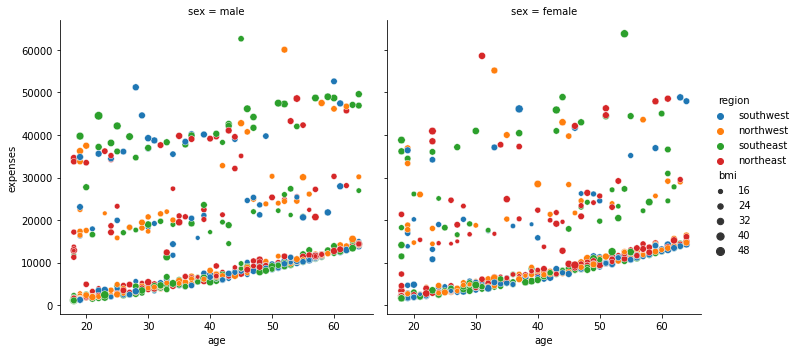

In [15]:
sns.relplot(x='age', y='expenses', data=df, hue='region', col='sex', size='bmi')

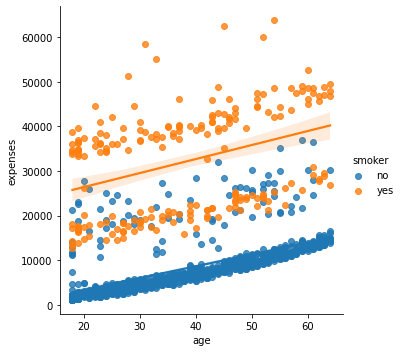

In [16]:
sns.lmplot(x='age', y='expenses',hue='smoker', data=df)

Observation:

1.people who are non-smoker are having expenses less than 30k and more samples ranges between 2k to 15k.
2.people who smokes are having expenses more than 15k and more samples ranges between 30k to 50k.
3.age increases as expenses increases.

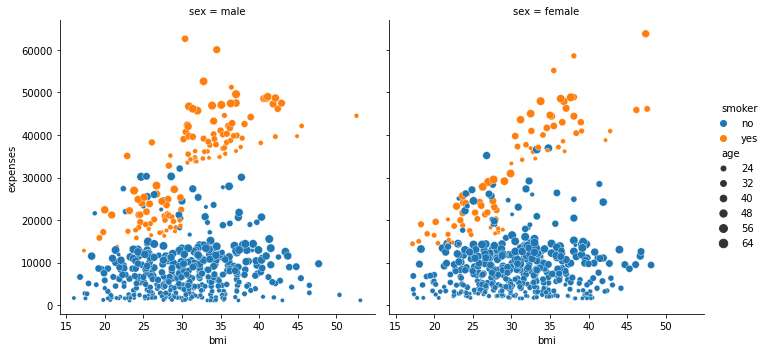

In [17]:
sns.relplot(x='bmi', y='expenses', data=df, hue='smoker', col='sex', size='age')

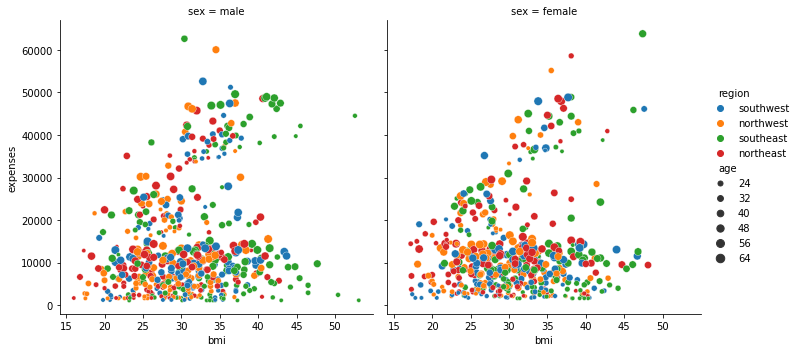

In [18]:
sns.relplot(x='bmi', y='expenses', data=df, hue='region', col='sex', size='age')

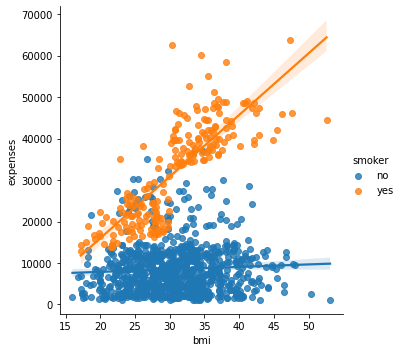

In [19]:
sns.lmplot(x='bmi', y='expenses',hue='smoker', data=df)

Observation:
1.some linear relatioship we can see between expenses and bmi.
2.non-smokers samples are more populated under 15K whereas smokers above 20K.

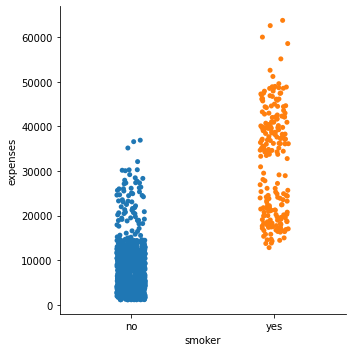

In [20]:
sns.catplot(x='smoker', y='expenses', data=df)

Observation:
1.Smokers expenses are above 15k.
2.Non-smokers expenses are below 35k.

In [21]:
numerical_columns = df.select_dtypes('number').columns
numerical_columns

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

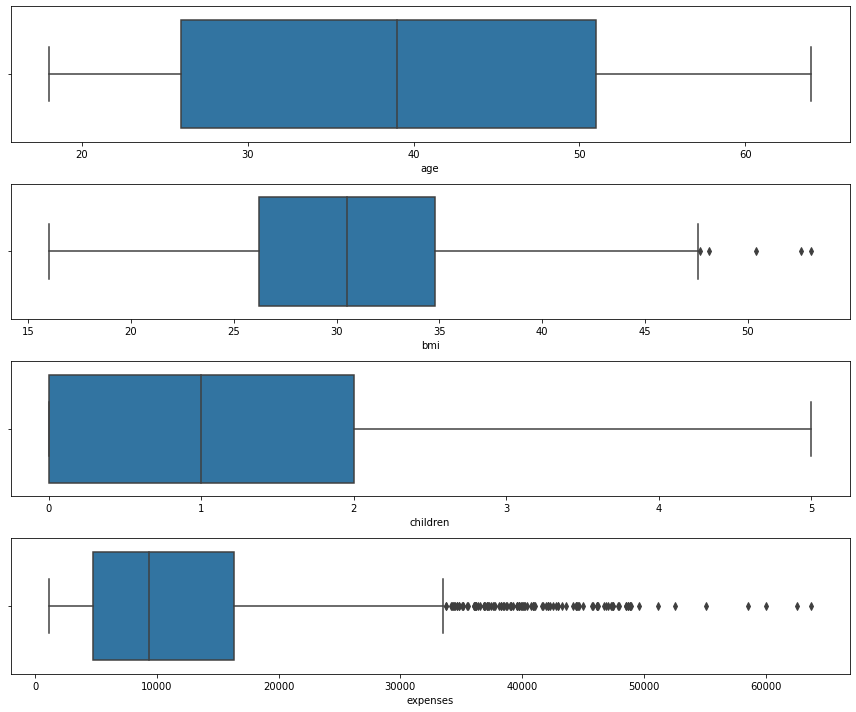

In [22]:
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_columns):
    ax = plt.subplot(4,1,i+1)
    sns.boxplot(x=col, data=df, ax=ax)
plt.tight_layout()

Observation:
1.Outiliers are found in BMI and Expenses.
2.bmi is following normal distribution and expenses is right skewed distribution.

<AxesSubplot:xlabel='bmi', ylabel='smoker'>

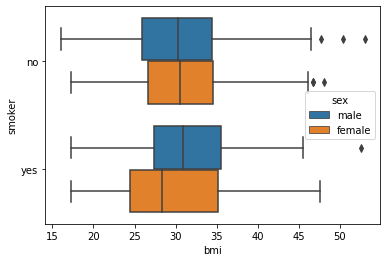

In [23]:
sns.boxplot(x='bmi', y='smoker',data=df, hue='sex')

In [24]:
upper_limit = df['bmi'].mean() + 3*df['bmi'].std()
lower_limit = df['bmi'].mean() - 3*df['bmi'].std()
upper_limit, lower_limit
# calculating upper and lower limit for bmi attribute

(49.08088803387575, 12.318176512429208)

In [25]:
df[df['bmi'] > upper_limit]
df.loc[df['bmi'] > upper_limit, 'bmi'] = upper_limit
# replacing outliers with upper_limit

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,35,male,27.1,1,no,southwest,4746.34
1,48,female,36.6,0,no,northwest,8671.19
2,58,female,36.5,0,no,northwest,12235.84
3,23,female,32.8,2,yes,southeast,36021.01
4,34,female,23.6,0,no,northeast,4992.38


<AxesSubplot:>

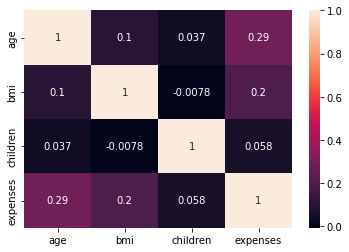

In [27]:
# correlation
sns.heatmap(df.corr(),annot=True)
# age and bmi are correlated with target column whereas children is having very less correlation.